In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set()

## 讀入crime type資料

In [26]:
df1 = pd.read_csv("/Users/CSIEK503/Desktop/crimeType.csv")

crime type資料包含二個欄位，crime_ID及crime_type03，應該是犯罪人ID亂碼化及犯罪類型。資料檔有2各欄位，631199筆資料。

In [27]:
df1.head()

,crime_ID,crime_type03
0,FFFFFFFFBA677FC9,13
1,FFFFFFFFD8DB4141,13
2,FFFFFFFFDB51030D,14
3,FFFFFFFFA4AD8487,14
4,FFFFFFFFD7183C0D,13


In [28]:
df1.shape

(631199, 2)

犯罪類型共有10類，1, 2, 3, 5, 8, 9, 10, 11, 13, 14，詳細對應項目待查。每一種犯罪類型的統計次數，如下表

In [35]:
tt = df1.groupby('crime_type03') #依據crime_type03欄位分類
tc = tt.size() #統計每一種犯罪的次數

In [36]:
tc.index #讀取犯罪類型

Int64Index([1, 2, 3, 5, 8, 9, 10, 11, 13, 14], dtype='int64', name='crime_type03')

In [76]:
#製作犯罪類型與次數統計表
ctab_dict = {"crimetype":tc.index,"counts":tc}
ctab_df = pd.DataFrame(ctab_dict)
ctab_df.index=ctab_df["crimetype"]
del ctab_df["crimetype"]
ctab_df.transpose()

crimetype,1,2,3,5,8,9,10,11,13,14
counts,7935,7653,6186,4695,183975,20765,35633,38846,211895,113616


### 繪製犯罪類型與次數條狀圖

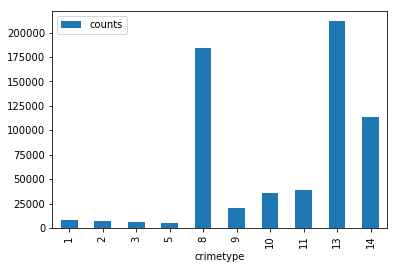

In [81]:
ctab_df.plot.bar()

#### 撰寫程式重新整理資料，顯示犯罪ID，犯罪次數，及犯罪類型。
例如

"FFFFFFFFA4AD8487",1,['14']

"FFFFFFFFB9873025",3,['14', '14', '14']

"4592FB68",5,['13', '13', '14', '13', '13']

其中"4592FB68"犯次為5次，5次犯罪中，犯罪類型包含13及14。

原始檔案共有63萬多筆資料，執行此類分析相當耗費時間。執行為結果儲存於crimeout1.csv檔案。

In [87]:
df2 = pd.read_csv("data/crimeout1.csv", header=None)

In [88]:
df2.columns=["crime_ID", "counts", "crime_Type"]

In [89]:
df2.head(5)

,crime_ID,counts,crime_Type
0,FFFFFFFFBA677FC9,1,['13']
1,FFFFFFFFD8DB4141,1,['13']
2,FFFFFFFFDB51030D,1,['14']
3,FFFFFFFFA4AD8487,1,['14']
4,FFFFFFFFD7183C0D,1,['13']


In [11]:
cc = df2.groupby('counts') #依據犯罪次數欄位分類

In [16]:
cc.size()

counts
1      414386
2       40917
3       12827
4        5379
5        2612
6        1600
7         934
8         678
9         401
10        350
11        377
12        264
13        174
14        140
15         83
16        124
17         77
18         85
19         75
20         95
21         29
22         38
23         41
24         27
25         12
26         17
27         14
28         23
29         32
30         14
        ...  
41          4
42          2
43          3
44          5
45          1
46          2
47          3
48          4
49          1
51          2
52          3
55          2
59          2
60          2
61          1
64          1
66          1
67          1
74          1
76          1
77          1
78          2
81          1
82          4
88          3
107         2
144         1
156         1
223         1
232         1
Length: 70, dtype: int64

#### 犯次與人數統計表

In [141]:
count = cc.size()
cgt5 = count[7:70].sum()
dfy = list(count[0:5].values)
dfy.append(cgt5)
countDF = pd.DataFrame({"numOfPeople":dfy, "counts":[1,2,3,4,5,">6"]})
countDF.index=countDF["counts"]
del countDF["counts"]
countDF.transpose()

counts,1,2,3,4,5,>6
numOfPeople,414386,40917,12827,5379,2612,3291


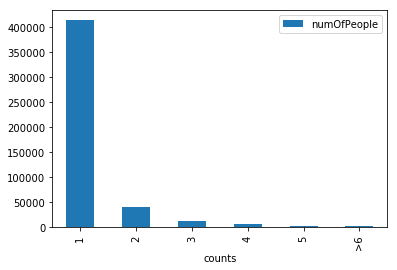

In [143]:
countDF.plot(kind="bar") #繪製條狀圖

In [144]:
df2[df2['counts']==3] #列出犯次3所有資料

,crime_ID,counts,crime_Type
82,5F74BB87,3,"['8', '8', '8']"
105,FFFFFFFFA8D5DE31,3,"['8', '8', '8']"
106,FFFFFFFFA8D5DE50,3,"['8', '8', '8']"
107,FFFFFFFFA8D5DE6F,3,"['8', '8', '8']"
110,FFFFFFFFC6520D56,3,"['8', '8', '8']"
114,FFFFFFFFC66EB59D,3,"['8', '8', '8']"
156,FFFFFFFFF066B165,3,"['8', '8', '8']"
189,FFFFFFFFF437ECE4,3,"['13', '13', '13']"
196,1AF80F42,3,"['13', '13', '13']"
208,1D83C2B1,3,"['14', '14', '14']"


## 讀入犯罪日期資料

In [74]:
from dateutil import parser

In [5]:
crimedate_df = pd.read_csv("data/occurDate.csv")

In [6]:
crimedate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650552 entries, 0 to 650551
Data columns (total 3 columns):
id           650552 non-null object
crime_ID     650552 non-null object
occurDate    650552 non-null int64
dtypes: int64(1), object(2)
memory usage: 14.9+ MB


In [7]:
crimedate_df["date"]=crimedate_df["occurDate"].astype(str)

In [8]:
crimedate_df["year"]=crimedate_df["occurDate"]//10000
crimedate_df["month"]=(crimedate_df["occurDate"]%10000)//100
crimedate_df["day"]=crimedate_df["occurDate"]%100

In [9]:
crimedate_df.head()

,id,crime_ID,occurDate,date,year,month,day
0,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFBA677FC9,20111020,20111020,2011,10,20
1,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFD8DB4141,20120421,20120421,2012,4,21
2,000023aaefc5b81b3cd0b0f238f2f235,FFFFFFFFB526830A,20100312,20100312,2010,3,12
3,00004c2de7c6f4110fc3b0b6676df130,75703FB4,20100208,20100208,2010,2,8
4,0000ab48b06e0bb2cd59f1268fbbebb6,FFFFFFFFDB51030D,20130129,20130129,2013,1,29


In [10]:
crimedate_df["date1"]=pd.to_datetime(crimedate_df["date"],format='%Y%m%d', errors="coerce")

In [11]:
crimedate_df.head()

,id,crime_ID,occurDate,date,year,month,day,date1
0,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFBA677FC9,20111020,20111020,2011,10,20,2011-10-20
1,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFD8DB4141,20120421,20120421,2012,4,21,2012-04-21
2,000023aaefc5b81b3cd0b0f238f2f235,FFFFFFFFB526830A,20100312,20100312,2010,3,12,2010-03-12
3,00004c2de7c6f4110fc3b0b6676df130,75703FB4,20100208,20100208,2010,2,8,2010-02-08
4,0000ab48b06e0bb2cd59f1268fbbebb6,FFFFFFFFDB51030D,20130129,20130129,2013,1,29,2013-01-29


In [12]:
dd = crimedate_df.groupby("date1")

In [71]:
from dateutil import parser

In [13]:
df1=dd.size()

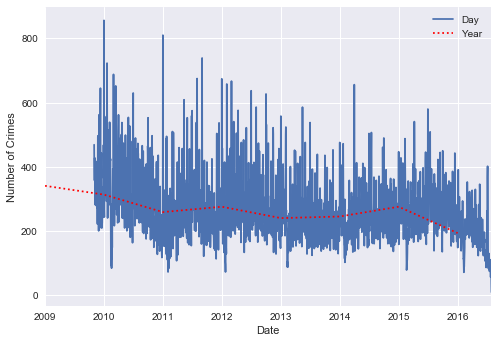

In [59]:
df1.plot()
df1.resample("BA").mean().plot(style='r:')
plt.legend(['Day','Year'], loc='upper right')
plt.ylabel('Number of Crimes')
plt.xlabel('Date')

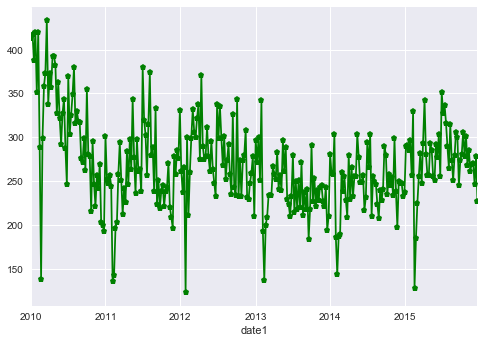

In [65]:
df1_mm = df1.resample("W").mean()
df1_mm["2010":"2015"].plot(style='gp-')